# MongoDB Project- Part B

In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [2]:
client = MongoClient('mongodb://localhost:27017/')

In [3]:
db = client['BDA']

In [4]:
db.list_collection_names()

['Customers']

In [5]:
# Looking at all the fields (including the nested ones) to be able to query only documents that have all the fields

def flatten_keys(d, parent_key=''):
    keys = []
    for k, v in d.items():
        full_key = f"{parent_key}.{k}" if parent_key else k
        if isinstance(v, dict):
            keys.extend(flatten_keys(v, full_key))
        else:
            keys.append(full_key)
    return keys

doc = db['Customers'].find_one()
all_keys = flatten_keys(doc)
print(all_keys)


['_id', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Services.PhoneService', 'Services.MultipleLines', 'Services.InternetService', 'Services.OnlineSecurity', 'Services.OnlineBackup', 'Services.DeviceProtection', 'Services.TechSupport', 'Services.StreamingTV', 'Services.StreamingMovies']



Writing an MQL query (Mongo Query Language) that returns:

a. Only documents that have all the fields.

b. All the fields except “_id”.

In [6]:
result = db.Customers.find({
    "customerID": {"$exists": True},
    "gender": {"$exists": True},
    "SeniorCitizen": {"$exists": True},
    "Partner": {"$exists": True},
    "Dependents": {"$exists": True},
    "tenure": {"$exists": True},
    "Contract": {"$exists": True},
    "PaperlessBilling": {"$exists": True},
    "PaymentMethod": {"$exists": True},
    "MonthlyCharges": {"$exists": True},
    "TotalCharges": {"$exists": True},
    "Services.PhoneService": {"$exists": True},
    "Services.MultipleLines": {"$exists": True},
    "Services.InternetService": {"$exists": True},
    "Services.OnlineSecurity": {"$exists": True},
    "Services.OnlineBackup": {"$exists": True},
    "Services.DeviceProtection": {"$exists": True},
    "Services.TechSupport": {"$exists": True},
    "Services.StreamingTV": {"$exists": True},
    "Services.StreamingMovies": {"$exists": True},
}, {"_id": 0})

len(list(result))

24221

We cleaned the data from 25000 documents to 24221 documents that have all the fields

Importing the collection to a Pandas dataframe:

In [7]:
df = pd.DataFrame(db.Customers.find({
    "customerID": {"$exists": True},
    "gender": {"$exists": True},
    "SeniorCitizen": {"$exists": True},
    "Partner": {"$exists": True},
    "Dependents": {"$exists": True},
    "tenure": {"$exists": True},
    "Contract": {"$exists": True},
    "PaperlessBilling": {"$exists": True},
    "PaymentMethod": {"$exists": True},
    "MonthlyCharges": {"$exists": True},
    "TotalCharges": {"$exists": True},
    "Services.PhoneService": {"$exists": True},
    "Services.MultipleLines": {"$exists": True},
    "Services.InternetService": {"$exists": True},
    "Services.OnlineSecurity": {"$exists": True},
    "Services.OnlineBackup": {"$exists": True},
    "Services.DeviceProtection": {"$exists": True},
    "Services.TechSupport": {"$exists": True},
    "Services.StreamingTV": {"$exists": True},
    "Services.StreamingMovies": {"$exists": True},
}, {"_id": 0}))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Services
0,id7044,Male,0,Yes,No,3.880000,Month-to-month,[No],Electronic check,74.820000,184.82,"{'PhoneService': 'Yes', 'MultipleLines': 'No',..."
1,id7045,Male,0,No,Yes,29.779905,Month-to-month,[Yes],Credit card (automatic),40.301502,1359.7,"{'PhoneService': 'No', 'MultipleLines': 'Yes',..."
2,id7046,Female,0,Yes,Yes,34.546357,Month-to-month,[Yes],Mailed check,59.778062,1752.55,"{'PhoneService': 'Yes', 'MultipleLines': 'No',..."
3,id7047,Male,0,No,No,1.790000,Month-to-month,[Yes],Electronic check,100.460000,493.84,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'..."
4,id7048,Female,0,No,Yes,5.580000,Month-to-month,[Yes],Electronic check,74.880000,74.66,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
24216,id32038,Male,0,No,No,10.304650,Month-to-month,[Yes],Credit card (automatic),91.817322,867.3,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'..."
24217,id32039,Male,0,No,Yes,4.400000,Month-to-month,[No],Electronic check,84.500000,476.82,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'..."
24218,id32040,Male,0,No,Yes,3.130000,Month-to-month,[Yes],Electronic check,90.710000,329.33,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'..."
24219,id32041,Male,0,Yes,Yes,33.154407,Month-to-month,[Yes],Mailed check,76.120814,238.15,"{'PhoneService': 'Yes', 'MultipleLines': 'Yes'..."


### Using MongoDB Compass to analyze the scheme

These are the problematic (non-scalar) columns:
1. PaymentMethod - 4% of the results are undefined --> meaning the field doesn’t exist
2. Services - document with 9 nested fields --> create new columns out of the nested fields
3. PaperlessBilling - the results are inside an array --> We need to extract them from the array
4. Tenure - 99% are double (float) and 1% are int --> convert all values to float
5. TotalCharges - 52% are strings and 48% are double (float) --> convert all values to float

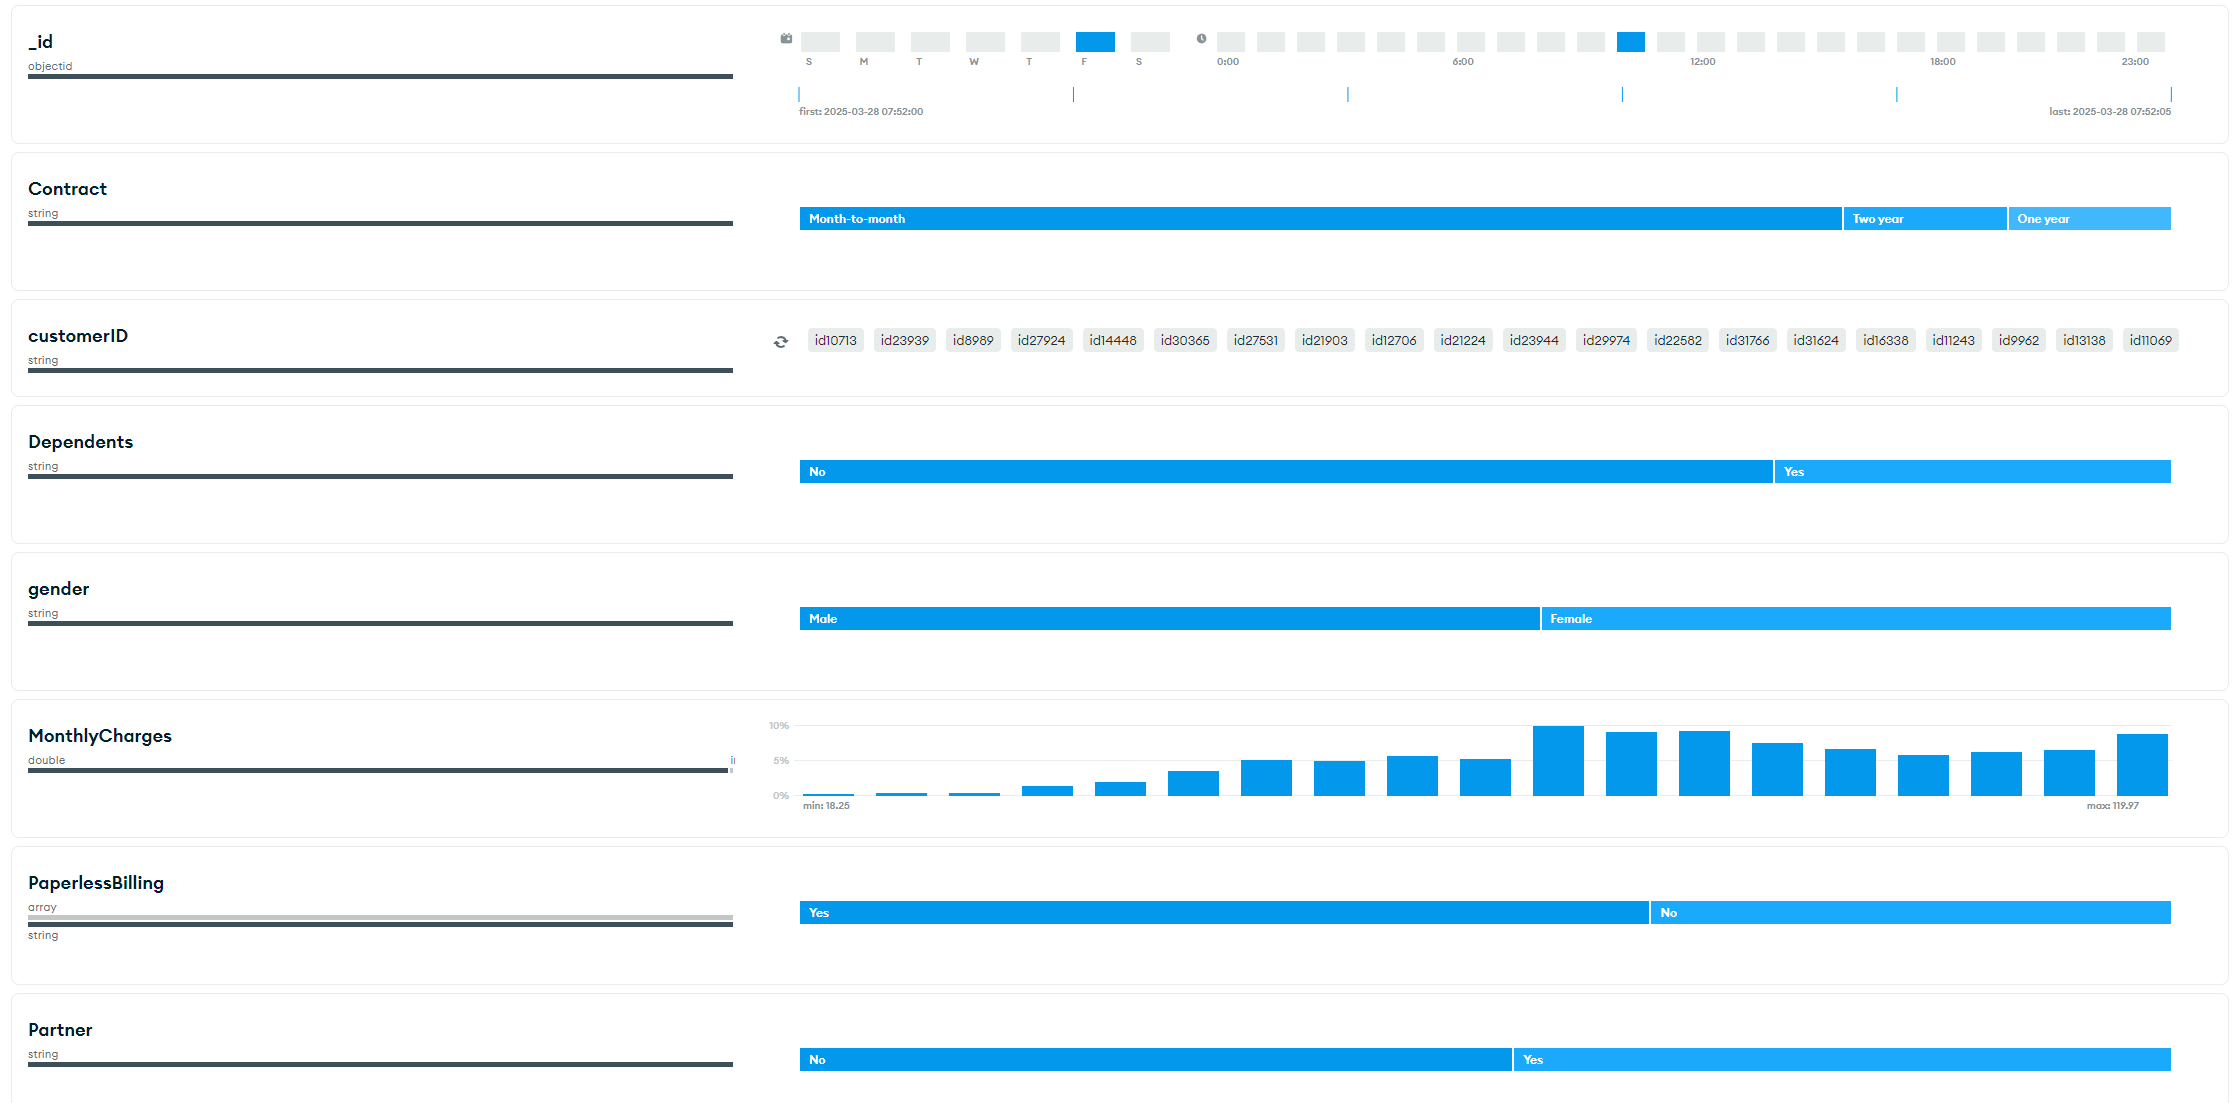
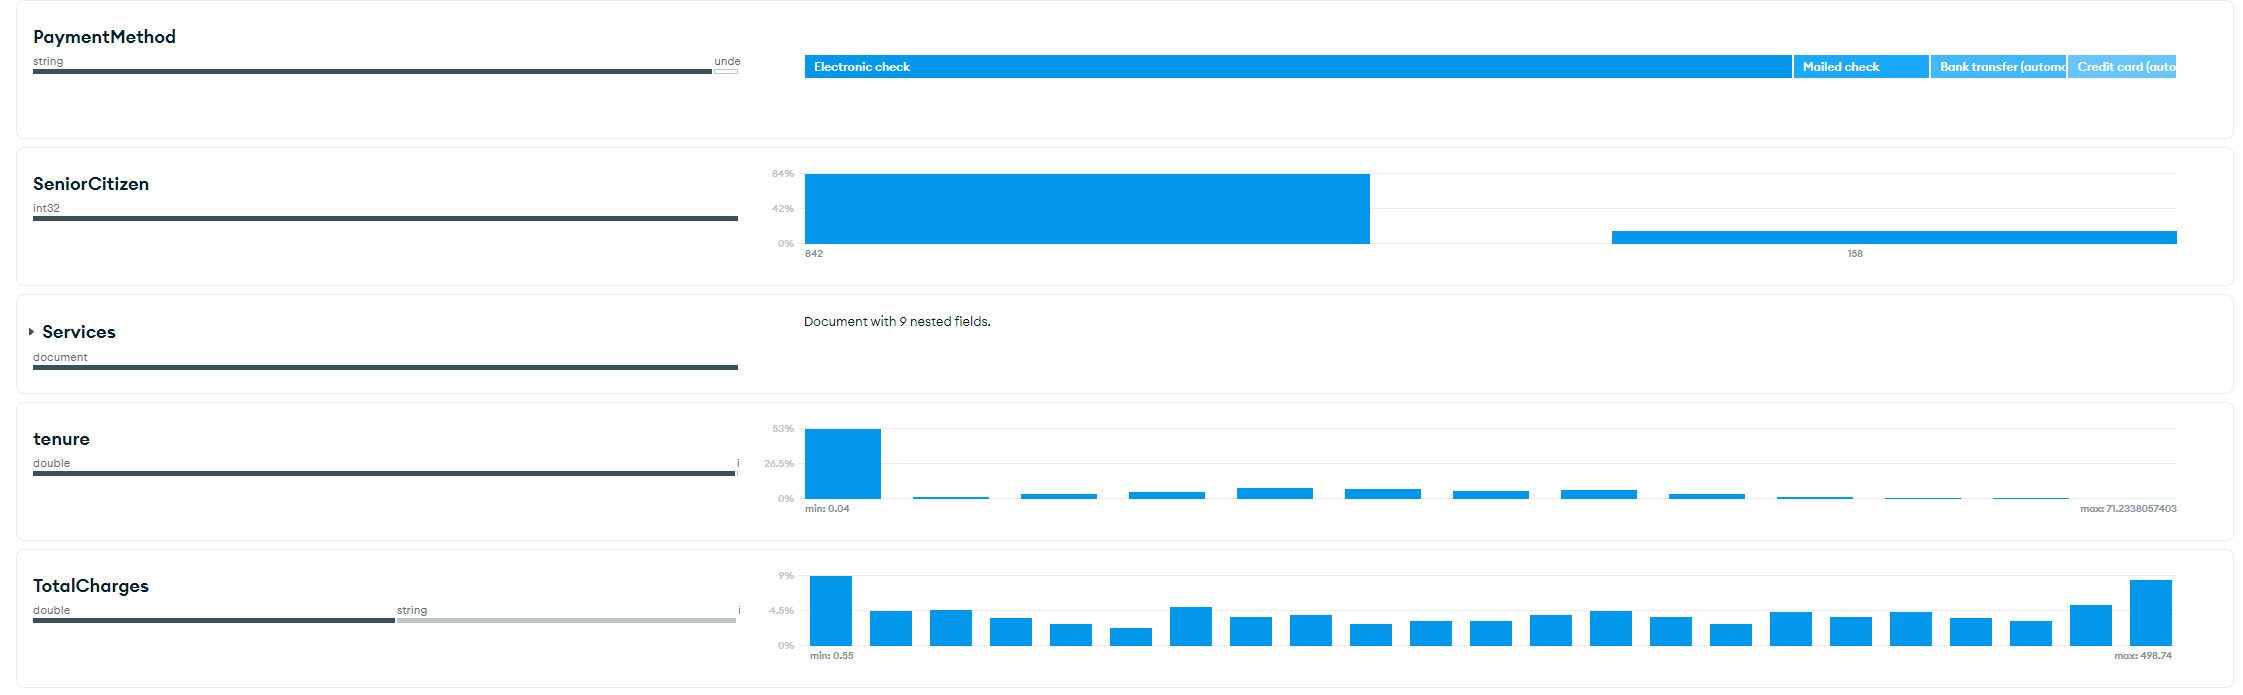

#### 1. Fixing PaymentMethod column
- We already solved this when we cleaned the documents to those that only have existing fields!

#### 2. Fixing Services column

Creating the new nececery columns

In [8]:
from pandas import json_normalize

In [9]:
list_cur = list((db.Customers.find({
    "customerID": {"$exists": True},
    "gender": {"$exists": True},
    "SeniorCitizen": {"$exists": True},
    "Partner": {"$exists": True},
    "Dependents": {"$exists": True},
    "tenure": {"$exists": True},
    "Contract": {"$exists": True},
    "PaperlessBilling": {"$exists": True},
    "PaymentMethod": {"$exists": True},
    "MonthlyCharges": {"$exists": True},
    "TotalCharges": {"$exists": True},
    "Services.PhoneService": {"$exists": True},
    "Services.MultipleLines": {"$exists": True},
    "Services.InternetService": {"$exists": True},
    "Services.OnlineSecurity": {"$exists": True},
    "Services.OnlineBackup": {"$exists": True},
    "Services.DeviceProtection": {"$exists": True},
    "Services.TechSupport": {"$exists": True},
    "Services.StreamingTV": {"$exists": True},
    "Services.StreamingMovies": {"$exists": True},
}, {"_id": 0})))

In [10]:
# Normalize the data
normalized_data = json_normalize(list_cur)
normalized_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Services.PhoneService,Services.MultipleLines,Services.InternetService,Services.OnlineSecurity,Services.OnlineBackup,Services.DeviceProtection,Services.TechSupport,Services.StreamingTV,Services.StreamingMovies
0,id7044,Male,0,Yes,No,3.880000,Month-to-month,[No],Electronic check,74.820000,184.82,Yes,No,DSL,No internet service,Yes,No internet service,Yes,No,Yes
1,id7045,Male,0,No,Yes,29.779905,Month-to-month,[Yes],Credit card (automatic),40.301502,1359.7,No,Yes,DSL,No internet service,Yes,Yes,No internet service,Yes,Yes
2,id7046,Female,0,Yes,Yes,34.546357,Month-to-month,[Yes],Mailed check,59.778062,1752.55,Yes,No,DSL,Yes,No,Yes,No,No internet service,No internet service
3,id7047,Male,0,No,No,1.790000,Month-to-month,[Yes],Electronic check,100.460000,493.84,Yes,Yes,DSL,Yes,No,Yes,No internet service,No,Yes
4,id7048,Female,0,No,Yes,5.580000,Month-to-month,[Yes],Electronic check,74.880000,74.66,Yes,Yes,DSL,No internet service,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,id32038,Male,0,No,No,10.304650,Month-to-month,[Yes],Credit card (automatic),91.817322,867.3,Yes,Yes,Fiber optic,No internet service,Yes,Yes,Yes,Yes,No internet service
24217,id32039,Male,0,No,Yes,4.400000,Month-to-month,[No],Electronic check,84.500000,476.82,Yes,Yes,DSL,Yes,No,No,No,No,No internet service
24218,id32040,Male,0,No,Yes,3.130000,Month-to-month,[Yes],Electronic check,90.710000,329.33,Yes,Yes,Fiber optic,No internet service,No internet service,No,Yes,Yes,No
24219,id32041,Male,0,Yes,Yes,33.154407,Month-to-month,[Yes],Mailed check,76.120814,238.15,Yes,Yes,Fiber optic,No,Yes,No,No,No,No internet service


- We went from 24221 rows × 12 columns to 24221 rows × 20 columns- meaning we succesfully extracted all nested fields under Services

#### Renaming the extracted fields so it will coincide with the column names of the trained model

In [11]:
normalized_data.columns = [col.replace("Services.", "") if col.startswith("Services.") else col for col in normalized_data.columns]
normalized_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,id7044,Male,0,Yes,No,3.880000,Month-to-month,[No],Electronic check,74.820000,184.82,Yes,No,DSL,No internet service,Yes,No internet service,Yes,No,Yes
1,id7045,Male,0,No,Yes,29.779905,Month-to-month,[Yes],Credit card (automatic),40.301502,1359.7,No,Yes,DSL,No internet service,Yes,Yes,No internet service,Yes,Yes
2,id7046,Female,0,Yes,Yes,34.546357,Month-to-month,[Yes],Mailed check,59.778062,1752.55,Yes,No,DSL,Yes,No,Yes,No,No internet service,No internet service
3,id7047,Male,0,No,No,1.790000,Month-to-month,[Yes],Electronic check,100.460000,493.84,Yes,Yes,DSL,Yes,No,Yes,No internet service,No,Yes
4,id7048,Female,0,No,Yes,5.580000,Month-to-month,[Yes],Electronic check,74.880000,74.66,Yes,Yes,DSL,No internet service,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,id32038,Male,0,No,No,10.304650,Month-to-month,[Yes],Credit card (automatic),91.817322,867.3,Yes,Yes,Fiber optic,No internet service,Yes,Yes,Yes,Yes,No internet service
24217,id32039,Male,0,No,Yes,4.400000,Month-to-month,[No],Electronic check,84.500000,476.82,Yes,Yes,DSL,Yes,No,No,No,No,No internet service
24218,id32040,Male,0,No,Yes,3.130000,Month-to-month,[Yes],Electronic check,90.710000,329.33,Yes,Yes,Fiber optic,No internet service,No internet service,No,Yes,Yes,No
24219,id32041,Male,0,Yes,Yes,33.154407,Month-to-month,[Yes],Mailed check,76.120814,238.15,Yes,Yes,Fiber optic,No,Yes,No,No,No,No internet service


#### 3. Fixing PaperlessBilling column
Extracting the string values out of the arrays

In [12]:
normalized_data['PaperlessBilling'] = normalized_data['PaperlessBilling'].str[0]
normalized_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,id7044,Male,0,Yes,No,3.880000,Month-to-month,No,Electronic check,74.820000,184.82,Yes,No,DSL,No internet service,Yes,No internet service,Yes,No,Yes
1,id7045,Male,0,No,Yes,29.779905,Month-to-month,Yes,Credit card (automatic),40.301502,1359.7,No,Yes,DSL,No internet service,Yes,Yes,No internet service,Yes,Yes
2,id7046,Female,0,Yes,Yes,34.546357,Month-to-month,Yes,Mailed check,59.778062,1752.55,Yes,No,DSL,Yes,No,Yes,No,No internet service,No internet service
3,id7047,Male,0,No,No,1.790000,Month-to-month,Yes,Electronic check,100.460000,493.84,Yes,Yes,DSL,Yes,No,Yes,No internet service,No,Yes
4,id7048,Female,0,No,Yes,5.580000,Month-to-month,Yes,Electronic check,74.880000,74.66,Yes,Yes,DSL,No internet service,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,id32038,Male,0,No,No,10.304650,Month-to-month,Yes,Credit card (automatic),91.817322,867.3,Yes,Yes,Fiber optic,No internet service,Yes,Yes,Yes,Yes,No internet service
24217,id32039,Male,0,No,Yes,4.400000,Month-to-month,No,Electronic check,84.500000,476.82,Yes,Yes,DSL,Yes,No,No,No,No,No internet service
24218,id32040,Male,0,No,Yes,3.130000,Month-to-month,Yes,Electronic check,90.710000,329.33,Yes,Yes,Fiber optic,No internet service,No internet service,No,Yes,Yes,No
24219,id32041,Male,0,Yes,Yes,33.154407,Month-to-month,Yes,Mailed check,76.120814,238.15,Yes,Yes,Fiber optic,No,Yes,No,No,No,No internet service


- PaperlessBilling values are no longer inside arrays

#### 4. + 5. Fixing Tenure and TotalCharges columns
Converting all values to float

In [13]:
normalized_data['tenure'] = pd.to_numeric(normalized_data['tenure'], errors='coerce')
normalized_data['TotalCharges'] = pd.to_numeric(normalized_data['TotalCharges'], errors='coerce')
normalized_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

- All numeric columns are float or int as required

## Preparing the df to be used in the ML model

In [14]:
churn = normalized_data.copy()
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,id7044,Male,0,Yes,No,3.880000,Month-to-month,No,Electronic check,74.820000,184.82,Yes,No,DSL,No internet service,Yes,No internet service,Yes,No,Yes
1,id7045,Male,0,No,Yes,29.779905,Month-to-month,Yes,Credit card (automatic),40.301502,1359.70,No,Yes,DSL,No internet service,Yes,Yes,No internet service,Yes,Yes
2,id7046,Female,0,Yes,Yes,34.546357,Month-to-month,Yes,Mailed check,59.778062,1752.55,Yes,No,DSL,Yes,No,Yes,No,No internet service,No internet service
3,id7047,Male,0,No,No,1.790000,Month-to-month,Yes,Electronic check,100.460000,493.84,Yes,Yes,DSL,Yes,No,Yes,No internet service,No,Yes
4,id7048,Female,0,No,Yes,5.580000,Month-to-month,Yes,Electronic check,74.880000,74.66,Yes,Yes,DSL,No internet service,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216,id32038,Male,0,No,No,10.304650,Month-to-month,Yes,Credit card (automatic),91.817322,867.30,Yes,Yes,Fiber optic,No internet service,Yes,Yes,Yes,Yes,No internet service
24217,id32039,Male,0,No,Yes,4.400000,Month-to-month,No,Electronic check,84.500000,476.82,Yes,Yes,DSL,Yes,No,No,No,No,No internet service
24218,id32040,Male,0,No,Yes,3.130000,Month-to-month,Yes,Electronic check,90.710000,329.33,Yes,Yes,Fiber optic,No internet service,No internet service,No,Yes,Yes,No
24219,id32041,Male,0,Yes,Yes,33.154407,Month-to-month,Yes,Mailed check,76.120814,238.15,Yes,Yes,Fiber optic,No,Yes,No,No,No,No internet service


In [15]:
churn = churn.rename(columns=str.lower) #renaming coulmns
churn.isna().sum() #checking for NA values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        3
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

We will drop the 3 rows with NA, which is just 0.0124% from the data.

In [16]:
churn = churn.dropna(subset=["totalcharges"])
churn.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
dtype: int64

#### Categorical columns to numeric

In [17]:
churn.partner = churn.partner.map({'Yes':1, 'No':0})

churn.dependents = churn.dependents.map({'Yes':1, 'No':0})

churn.phoneservice = churn.phoneservice.map({'Yes':1, 'No':0})

churn.paperlessbilling = churn.paperlessbilling.map({'Yes':1, 'No':0})

#### Categorical values to 1-hot

In [18]:
# We'll temprarily get rid of customerid column in order to be able to use get_dummies and convert everything to int, later when we use the model we'll re-insert customerid

churn = churn.drop(['customerid'], axis=1)

categorical_columns = ["gender", "multiplelines", "internetservice", "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies", "contract", "paymentmethod"]

churn = pd.get_dummies(churn, columns=categorical_columns).astype(int)
churn.head(10)

,seniorcitizen,partner,dependents,tenure,paperlessbilling,monthlycharges,totalcharges,phoneservice,gender_Female,gender_Male,...,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,3,0,74,184,1,0,1,...,0,0,1,1,0,0,0,0,1,0
1,0,0,1,29,1,40,1359,0,0,1,...,0,0,1,1,0,0,0,1,0,0
2,0,1,1,34,1,59,1752,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,1,1,100,493,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,0,0,1,5,1,74,74,1,1,0,...,0,0,1,1,0,0,0,0,1,0
5,1,0,0,31,0,87,845,1,1,0,...,1,0,0,0,0,1,1,0,0,0
6,0,0,0,52,1,30,4447,1,0,1,...,0,0,1,0,0,1,0,0,0,1
7,0,1,0,32,0,64,303,1,0,1,...,0,1,0,0,1,0,0,0,1,0
8,0,1,0,0,0,72,141,1,0,1,...,1,0,0,1,0,0,0,0,1,0
9,0,0,0,3,1,77,357,1,0,1,...,0,1,0,1,0,0,0,0,1,0


In [19]:
churn.dtypes

seniorcitizen                              int64
partner                                    int64
dependents                                 int64
tenure                                     int64
paperlessbilling                           int64
monthlycharges                             int64
totalcharges                               int64
phoneservice                               int64
gender_Female                              int64
gender_Male                                int64
multiplelines_No                           int64
multiplelines_No phone service             int64
multiplelines_Yes                          int64
internetservice_DSL                        int64
internetservice_Fiber optic                int64
internetservice_No                         int64
onlinesecurity_No                          int64
onlinesecurity_No internet service         int64
onlinesecurity_Yes                         int64
onlinebackup_No                            int64
onlinebackup_No inte

- All features are numeric, but like we did in Part A we have redundant columns

In [20]:
# List of redundant columns to drop
redundant_columns = [
    "onlinesecurity_No internet service",
    "onlinebackup_No internet service",
    "deviceprotection_No internet service",
    "techsupport_No internet service",
    "streamingtv_No internet service",
    "streamingmovies_No internet service",
    "multiplelines_No phone service"
]

# Drop redundant columns from the DataFrame
churn = churn.drop(columns=redundant_columns)

churn.head(5)

,seniorcitizen,partner,dependents,tenure,paperlessbilling,monthlycharges,totalcharges,phoneservice,gender_Female,gender_Male,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,3,0,74,184,1,0,1,...,0,0,1,1,0,0,0,0,1,0
1,0,0,1,29,1,40,1359,0,0,1,...,1,0,1,1,0,0,0,1,0,0
2,0,1,1,34,1,59,1752,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,1,100,493,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,0,0,1,5,1,74,74,1,1,0,...,0,0,1,1,0,0,0,0,1,0


We have 34 columns like we had in the training data on Part A

## Machine Learning- Using Random Forest Model to predict churn

In [21]:
df_ml = churn.copy()

#### To use the trained random forest model from part A, we added to the Part A notebook the following code:

##### Running the model again with the best hyperparameters:

rf_model = RandomForestClassifier(n_estimators=151, max_depth=7, random_state=42) 

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

##### Saving it:

import joblib

joblib.dump(model, 'random_forest_model.pkl')

- This way we could use the model that we already trained using ~1400 examples to apply to the new dataset

In order to use the same trained model we need the columns of both data sets to look the same, right now we have:

In [22]:
df_ml.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'paperlessbilling',
       'monthlycharges', 'totalcharges', 'phoneservice', 'gender_Female',
       'gender_Male', 'multiplelines_No', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
       'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
       'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

#### The columns are ordered differently than the trained data, so in order to coincide we will arrange them in the same manner

In [23]:
# The order the columns were in Part A

desired_order = [
    'seniorcitizen', 'partner', 'dependents', 'tenure',
    'phoneservice', 'paperlessbilling', 'monthlycharges', 'totalcharges',
    'gender_Female', 'gender_Male', 'multiplelines_No', 'multiplelines_Yes',
    'internetservice_DSL', 'internetservice_Fiber optic',
    'internetservice_No', 'onlinesecurity_No', 'onlinesecurity_Yes',
    'onlinebackup_No', 'onlinebackup_Yes', 'deviceprotection_No',
    'deviceprotection_Yes', 'techsupport_No', 'techsupport_Yes',
    'streamingtv_No', 'streamingtv_Yes', 'streamingmovies_No',
    'streamingmovies_Yes', 'contract_Month-to-month', 'contract_One year',
    'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
    'paymentmethod_Credit card (automatic)',
    'paymentmethod_Electronic check', 'paymentmethod_Mailed check'
]

df_ml = df_ml[desired_order]

##### Using the model on the new dataset:

In [24]:
import joblib

# Load the model
model = joblib.load('random_forest_model.pkl')

# Predict on new data
predicted_churn = model.predict(df_ml)

In [25]:
predicted_churn

array([0, 0, 0, ..., 1, 0, 1], shape=(24218,))

In [26]:
df_ml['predicted_churn'] = model.predict(df_ml)

#### Saving the original 20 columns (before one-hot encoding) and adding the new predicted_churn column

In [27]:
print(normalized_data.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [28]:
# Keep only the original 20 columns + predicted churn
original_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Copy from the original (pre-encoded) DataFrame
final_df = normalized_data[original_cols].copy()

# Add predictions
final_df['predicted_churn'] = df_ml['predicted_churn']

# Save to CSV
final_df.to_csv('churn_with_predictions.csv', index=False)

#### Let's look at the churn prediction distribution of the new dataset

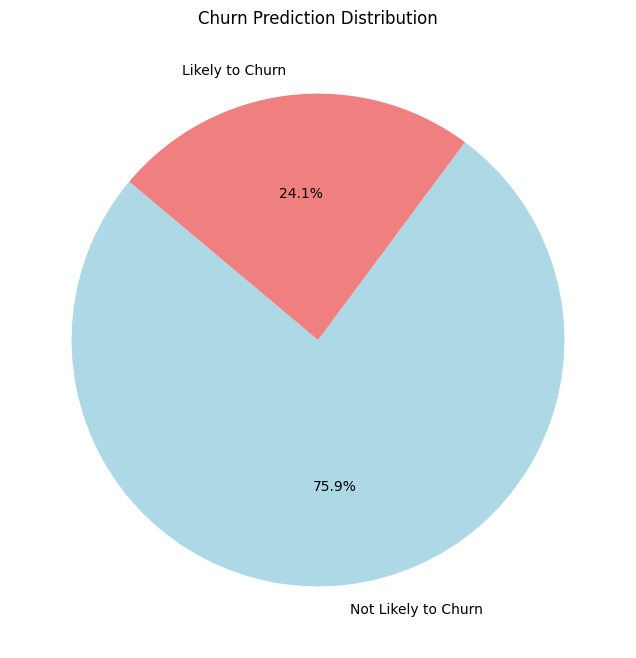

In [30]:
# Count occurrences of each churn label
churn_counts = final_df["predicted_churn"].value_counts()

# Calculate percentages
churn_percent = final_df["predicted_churn"].value_counts(normalize=True) * 100

# Define custom labels
labels = ["Not Likely to Churn", "Likely to Churn"]

# Create a pie chart with updated labels
plt.figure(figsize=(8, 8))
plt.pie(churn_percent, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title("Churn Prediction Distribution")
plt.show()

The predicted distribution looks very similar to our training dataset